In [233]:
from __future__ import print_function
import os
import numpy as np
import neat
import matplotlib.pyplot as plt

np.random.seed(42)

fitnesses = []
errors = []

def eval_fitnesses(genomes, config):
    global fitnesses
    global errors
    fitnesses.append([])
    errors.append([])
    for genome in genomes:
        genome[1].fitness = 1
        net = neat.nn.FeedForwardNetwork.create(genome[1], config)
        inputs = np.random.random(2)
        res = inputs[0]+inputs[1]
        
        out = net.activate(inputs)
        out*=2
        #print("res: %.4f" % res)
        #print("out[0]: %.4f" % out[0])
        genome[1].fitness -= abs(res - out[0])#**4
        fitnesses[-1].append(genome[1].fitness)
        errors[-1].append(abs((res - out[0])))
        #print("genome[1].fitness: %.4f" % genome[1].fitness)
    
            
def run(config_file, gens):
    # Load configuration.
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    #p.add_reporter(neat.StdOutReporter(True))
    #stats = neat.StatisticsReporter()
    #p.add_reporter(stats)
    global fitnesses
    global errors
    fitnesses = []
    errors = []
    winner = p.run(eval_fitnesses, gens)

    print('\nBest genome:\n{!s}'.format(winner))

    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


if __name__ == '__main__':
    # Determine path to configuration file. This path manipulation is
    # here so that the script will run successfully regardless of the
    # current working directory.
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, 'config.txt')

In [5]:
gens = np.arange(1, 200)
best_errors = []
for gen in gens:
    best_error = run(config_path, gen)
    best_errors.append(best_error)

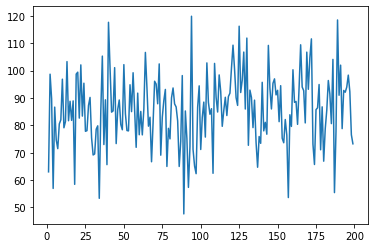

In [10]:
plt.plot(gens, best_errors)

In [47]:
gens = np.arange(1, 200)
best_errors = []
for gen in gens:
    best_error = run(config_path, gen)
    best_errors.append(best_error)

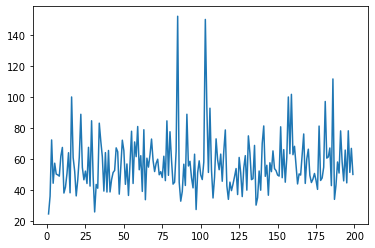

In [46]:
plt.plot(gens, best_errors)
bp = 99 #boundary percentile for axis scaling
#xmin0, xmax0 = np.percentile(gens, 100-bp), np.percentile(gens, bp)
#xmin1, xmax1 = np.percentile(best_errors, 100-bp), np.percentile(best_errors, bp)
#plt.axis([xmin0, xmax0, xmin1, xmax1])


Best genome:
Key: 9116
Fitness: 0.9998409900748674
Nodes:
	0 DefaultNodeGene(key=0, bias=1.2254599325671747, response=1.0, activation=sigmoid, aggregation=sum)
	319 DefaultNodeGene(key=319, bias=0.8017975341916633, response=1.0, activation=sigmoid, aggregation=sum)
	613 DefaultNodeGene(key=613, bias=-0.6611182695537199, response=1.0, activation=sigmoid, aggregation=sum)
	774 DefaultNodeGene(key=774, bias=-1.0146768576091365, response=1.0, activation=sigmoid, aggregation=sum)
	971 DefaultNodeGene(key=971, bias=-2.71381893040367, response=1.0, activation=sigmoid, aggregation=sum)
	976 DefaultNodeGene(key=976, bias=1.828315204447028, response=1.0, activation=sigmoid, aggregation=sum)
	1088 DefaultNodeGene(key=1088, bias=1.6691030737192607, response=1.0, activation=sigmoid, aggregation=sum)
	1268 DefaultNodeGene(key=1268, bias=1.2326937205605748, response=1.0, activation=sigmoid, aggregation=sum)
	1303 DefaultNodeGene(key=1303, bias=-0.20754269661125482, response=1.0, activation=sigmoid, 

Text(0.85, 0.85, 'Avg Error')

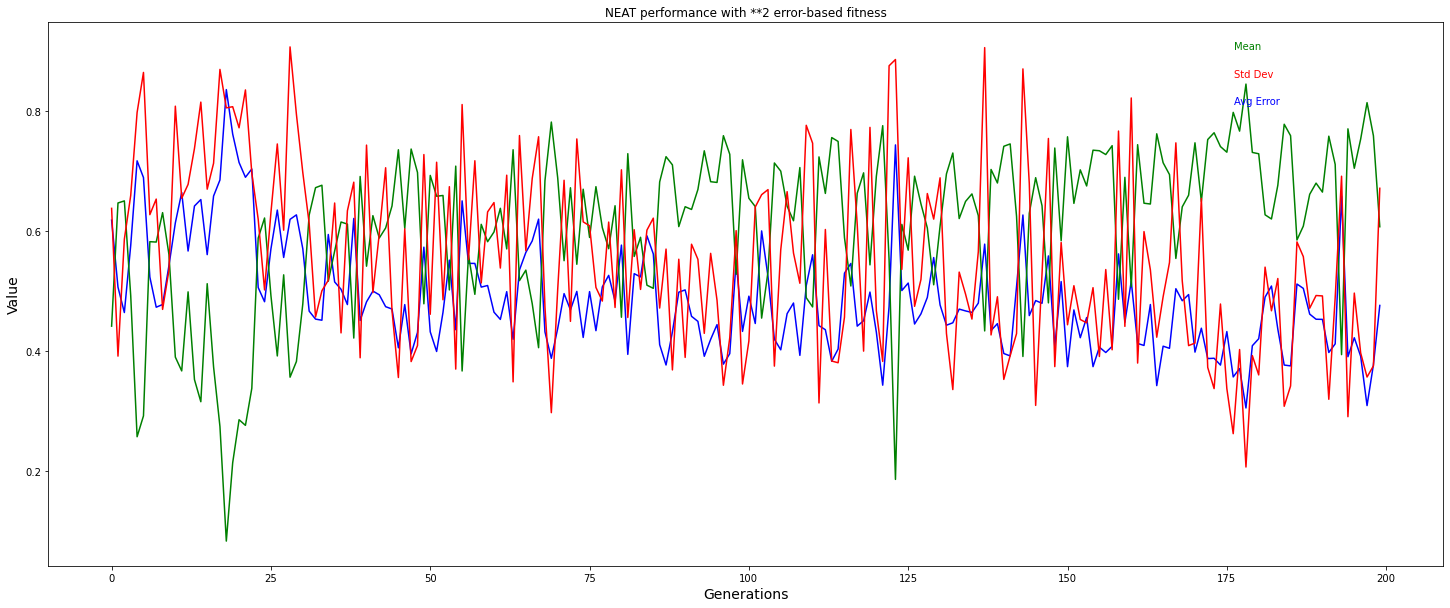

In [229]:
plt.figure(figsize=(25,10))

run(config_path, 200)

means = []
sds = []
err_means = []

for fitness_i in fitnesses:
    means.append(np.mean(fitness_i))
    sds.append(np.std(fitness_i))
    
for error_i in errors:
    err_means.append(np.mean(error_i))

plt.plot(err_means, 'b')
plt.plot(means, 'g')
plt.plot(sds, 'r')
plt.title("NEAT performance with **2 error-based fitness")
plt.xlabel("Generations", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.annotate('Mean', xy=(0.85, 0.95), xycoords='axes fraction', color="g")
plt.annotate('Std Dev', xy=(0.85, 0.90), xycoords='axes fraction', color="r")
plt.annotate('Avg Error', xy=(0.85, 0.85), xycoords='axes fraction', color="b")
#errors

In [225]:
print("Using fitness based on error**2")

Using fitness based on error**2



Best genome:
Key: 9003
Fitness: 0.9999999997497507
Nodes:
	0 DefaultNodeGene(key=0, bias=0.8614876950625246, response=1.0, activation=sigmoid, aggregation=sum)
	531 DefaultNodeGene(key=531, bias=-0.11294323997359693, response=1.0, activation=sigmoid, aggregation=sum)
	710 DefaultNodeGene(key=710, bias=1.5176272597945464, response=1.0, activation=sigmoid, aggregation=sum)
	790 DefaultNodeGene(key=790, bias=-0.7486123036738721, response=1.0, activation=sigmoid, aggregation=sum)
	1025 DefaultNodeGene(key=1025, bias=1.5285750732309782, response=1.0, activation=sigmoid, aggregation=sum)
	1195 DefaultNodeGene(key=1195, bias=-0.3405909136917389, response=1.0, activation=sigmoid, aggregation=sum)
	1293 DefaultNodeGene(key=1293, bias=0.2118662716257633, response=1.0, activation=sigmoid, aggregation=sum)
	1426 DefaultNodeGene(key=1426, bias=0.42123759848550524, response=1.0, activation=sigmoid, aggregation=sum)
	1587 DefaultNodeGene(key=1587, bias=0.15562313840061692, response=1.0, activation=s

Text(0.85, 0.85, 'Avg Error')

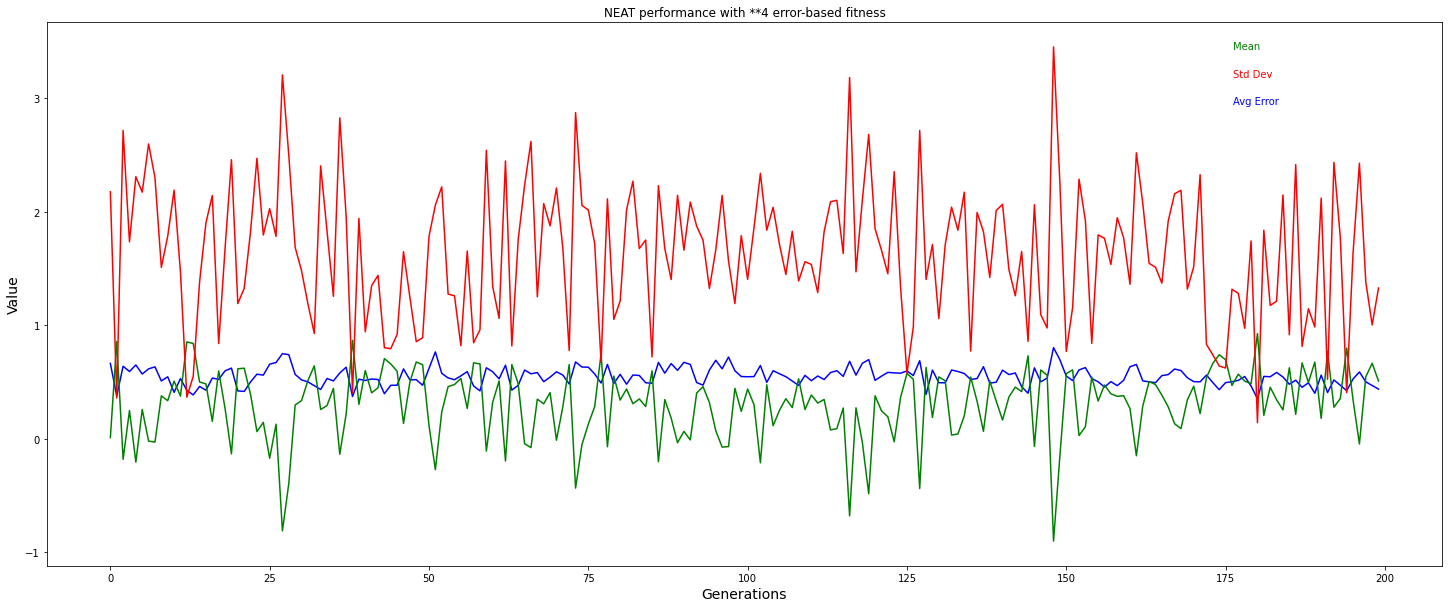

In [232]:
plt.figure(figsize=(25,10))

run(config_path, 200)

means = []
sds = []
err_means = []

for fitness_i in fitnesses:
    means.append(np.mean(fitness_i))
    sds.append(np.std(fitness_i))
    
for error_i in errors:
    err_means.append(np.mean(error_i))

plt.plot(err_means, 'b')
plt.plot(means, 'g')
plt.plot(sds, 'r')
plt.title("NEAT performance with **4 error-based fitness")
plt.xlabel("Generations", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.annotate('Mean', xy=(0.85, 0.95), xycoords='axes fraction', color="g")
plt.annotate('Std Dev', xy=(0.85, 0.90), xycoords='axes fraction', color="r")
plt.annotate('Avg Error', xy=(0.85, 0.85), xycoords='axes fraction', color="b")
#errors

In [170]:
print("Using **4 error, whereas before I was using **2 error")

Using **4 error, whereas before I was using **2 error



Best genome:
Key: 9131
Fitness: 0.9766429132214381
Nodes:
	0 DefaultNodeGene(key=0, bias=2.5747903253975686, response=1.0, activation=sigmoid, aggregation=sum)
	788 DefaultNodeGene(key=788, bias=1.5542225019854634, response=1.0, activation=sigmoid, aggregation=sum)
	979 DefaultNodeGene(key=979, bias=-1.3263249663038046, response=1.0, activation=sigmoid, aggregation=sum)
	1342 DefaultNodeGene(key=1342, bias=-0.8598869054731565, response=1.0, activation=sigmoid, aggregation=sum)
	1444 DefaultNodeGene(key=1444, bias=0.2753476924071053, response=1.0, activation=sigmoid, aggregation=sum)
	1514 DefaultNodeGene(key=1514, bias=0.20507956890349263, response=1.0, activation=sigmoid, aggregation=sum)
	1804 DefaultNodeGene(key=1804, bias=0.2796623228029974, response=1.0, activation=sigmoid, aggregation=sum)
	1812 DefaultNodeGene(key=1812, bias=-0.1677910678297043, response=1.0, activation=sigmoid, aggregation=sum)
	1862 DefaultNodeGene(key=1862, bias=-1.804298923905939, response=1.0, activation=s

Text(0.85, 0.85, 'Avg Error')

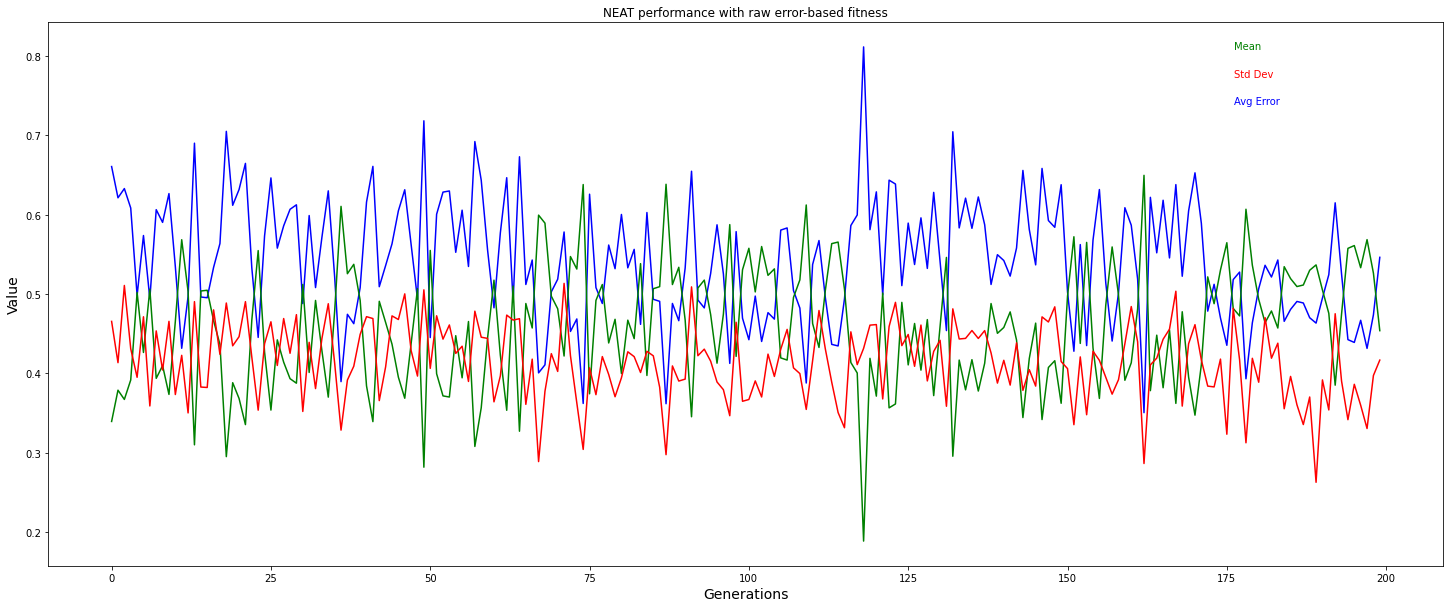

In [234]:
plt.figure(figsize=(25,10))

run(config_path, 200)

means = []
sds = []
err_means = []

for fitness_i in fitnesses:
    means.append(np.mean(fitness_i))
    sds.append(np.std(fitness_i))
    
for error_i in errors:
    err_means.append(np.mean(error_i))

plt.plot(err_means, 'b')
plt.plot(means, 'g')
plt.plot(sds, 'r')
plt.title("NEAT performance with raw error-based fitness")
plt.xlabel("Generations", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.annotate('Mean', xy=(0.85, 0.95), xycoords='axes fraction', color="g")
plt.annotate('Std Dev', xy=(0.85, 0.90), xycoords='axes fraction', color="r")
plt.annotate('Avg Error', xy=(0.85, 0.85), xycoords='axes fraction', color="b")
#errors

In [226]:
print("Using raw error")

Using raw error
